# Определение закономерностей успешности компьютерных игр

**Цель исследования** — Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Шаг 1. Обзор данных

Импортируем  библиотеку. Прочитаем файл с данными для анализа. Выведем на экран первые 15 строк и общую информацию о  таблице:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/datasets/games.csv') 

In [3]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Как мы видим, данные неоднородны по размеру. В некоторых таблицах есть пропуски, а так же типы данных в некоторых колонках не верны. Выполним предобработку данных.

### Шаг 2. Подготовка данных

<b>2.1 Замена названий столбцов (приведение к нижнему регистру).</b>

In [5]:
# перечень названий столбцов таблицы df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# переименование столбцов
df = df.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release' : 'year_of_release', 'Genre' : 'genre', 'NA_sales':'na_sales',
                       'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score',
                       'User_Score':'user_score', 'Rating':'rating' })

In [7]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<b>2.2 Обработка пропусков и изменение типов данных</b>

In [8]:
#Посчитаем количество пустых значений
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
#Посмотрим на таблицу, где имеются пустые значения в столбце name
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим пропуски в столбцах name и genre (пропуски совпадают) по причине их малого количества(всего 2 строки из таблицы).

In [10]:
df.dropna(subset=['name'], inplace=True)

Пропусков в year_of_release не много - 1,6% всех данных. Заполнить их не представляется возможным, поэтому тоже их удалим.Также, заменим тип данных с float64 на целочисленный.

In [11]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')

Пропусков в столбцах critic_score,user_score и rating  много, удалить их нельзя. 

В столбце rating заменим все пропуски на 'unknown', т.е. рейтинг неизвестный. Так сможем учесть эти данные при дальнейшем анализе.

In [12]:
df['rating'] = df['rating'].fillna('unknown')

Пропуски в столбцах critic_score и user_score заменим на -1. Значение tbd в user_score  означает to be discussed, т.е. неизвестное. Поэтому с помощью метода to_numeric приведем тип данных данного столбца к числовому и параллельно строки 'tbd' заменятся на NaN. Также, заменим тип данных в колонке critic_score на целочисленный.

In [13]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [14]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].astype('int')

In [15]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Выполним проверку.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


<b>2.3 Проверка на дубликаты</b>

In [17]:
df.duplicated().sum()

0

In [18]:
df.duplicated(subset=['name','platform']).sum()

3

In [19]:
df.loc[df.duplicated(subset=['name','platform']), :]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83,5.5,E


In [20]:
df.loc[df['name']==df['platform']]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [21]:
df['compare'] = df['name'] == df['platform']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,compare
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,False
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,False
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,False
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,False
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,False


In [22]:
df['compare'].value_counts()

False    16444
Name: compare, dtype: int64

<b>2.4 Подсчет суммарных продаж во всех регионах.</b>

In [23]:
#Создадим новый столбец total_sales и прибавим продажи всех столбцов
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [24]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,compare,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,False,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,False,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,False,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,False,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,False,31.38


### Шаг 3. Исследовательский анализ данных

<b>3.1 Выпуск игр в разные годы.</b>

In [25]:
#Построим сводную таблицу 
df.pivot_table(index='year_of_release', values='name', aggfunc = ['count'])

,count
,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


Text(0, 0.5, 'Количество игр')

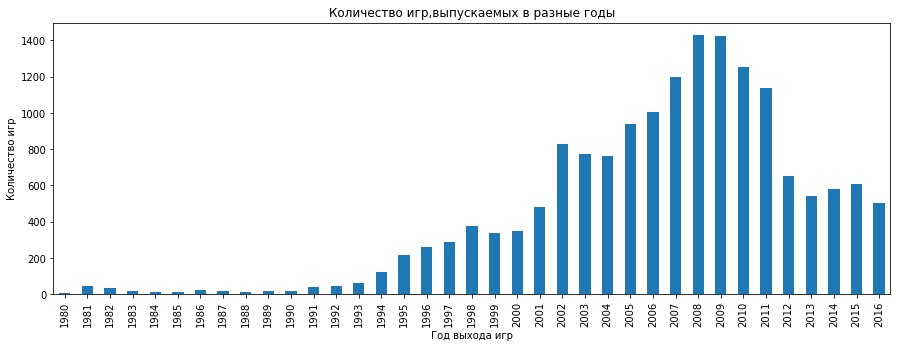

In [26]:
#Для наглядности построим диаграмму
import pylab as pl
df.groupby('year_of_release')['name'].count().plot(x='year_of_release',y='name',kind='bar', figsize=(15,5))
pl.title("Количество игр,выпускаемых в разные годы")
pl.xlabel("Год выхода игр")
pl.ylabel("Количество игр")

Из графика видно,  что произошел скачок в разработке игр после 1994 года, так продолжалось до 2009 года, после чего пошел спад и резкое падение по количкству  разработанных игр в 2012 году.
Для анализа данные за весь предоставленный период не нужны. Будут нужны только те, которые отражают тенденции последних лет. В данном случае это данные после 2011 года.

<b>3.2 Изменение продаж по платформам за весь период.</b>

In [27]:
#Построим сводную таблицу 
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_sales.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0, 0.5, 'Сумма продаж')

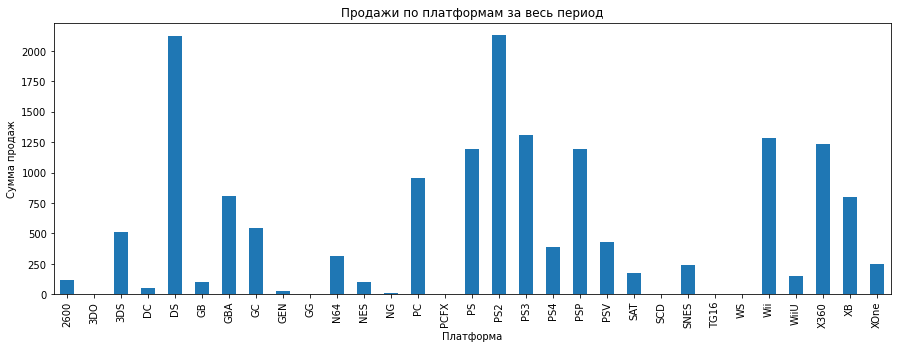

In [28]:
#Для наглядности построим диаграмму
df.groupby('platform')['total_sales'].count().plot(x='platform',y='total_sales', kind='bar', figsize=(15,5))
pl.title("Продажи по платформам за весь период")
pl.xlabel("Платформа")
pl.ylabel("Сумма продаж")

Из графика и сводной таблицы видно, что наибольшие суммарные продажи имеют платформы (топ5) это PS2, X360, PS3, WII, DS. Построим для этих платформ графики распределения суммарных продаж по годам.

In [29]:
import matplotlib.pyplot as plt

(2005.0, 2016.0)

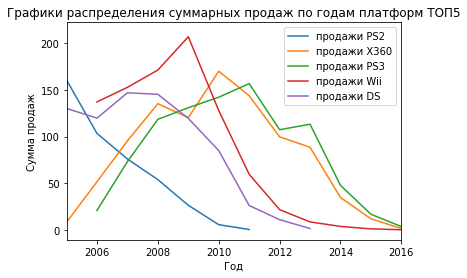

In [30]:
#Построим сводную таблицу 
platform_sales_year = df.pivot_table(index = 'year_of_release', columns = 'platform',values='total_sales',aggfunc=sum)
#Построим графики 
plt.plot(platform_sales_year['PS2'], label = 'продажи PS2')
plt.plot(platform_sales_year['X360'], label = 'продажи X360')
plt.plot(platform_sales_year['PS3'], label = 'продажи PS3')
plt.plot(platform_sales_year['Wii'], label = 'продажи Wii')
plt.plot(platform_sales_year['DS'], label = 'продажи DS')
plt.title("Графики распределения суммарных продаж по годам платформ ТОП5")
plt.xlabel("Год")
plt.ylabel("Сумма продаж")
plt.legend()
plt.xlim([2005, 2016])

Мы видим, что практически все игровые платформы в среднем существуют по 10 лет. Пик продаж наступает примерно через 5 лет после выхода платформы.

<b>3.3 Выбор  потенциально прибыльных платформ в актуальном периоде.</b>

Определим какие платформы лидируют по продажам, растут и падают в актуальном периоде. Актуальным периодом будем считать 2011 - 2016 года. Так как, это данные за последние несколько лет,  они отражают последние тенденции и на их основании можно делать  предположения о будущем.

In [31]:
#Сделаем срез по актуальному периоду
df_relevant = df.query('year_of_release >= 2011')
df_relevant.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,compare,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,False,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,False,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,False,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,False,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,False,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,False,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,False,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M,False,13.33
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85,8.2,E,False,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,False,12.62


Определим какие платформы лидируют по суммарным продажам в актуальном периоде.

In [32]:
#Построим сводную таблицу 
df_relevant_sales = df_relevant.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
df_relevant_sales.head(15)

,total_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


Из сводной таблицы видно, что наибольшие суммарные продажи в актуальном периоде имеют платформы (топ5) это PS3, X360, PS4,3DS, XOne. Мы видим, что произошли изменения в топ5 платформ. Сменился лидер, такие платформы как PS2,WII,DS не попали в топ в актуальном периоде. Вероятно, данные платформы устарели, на их место пришли новые версии платформ.

Построим для этих платформ графики распределения суммарных продаж по годам.

(2011.0, 2016.0)

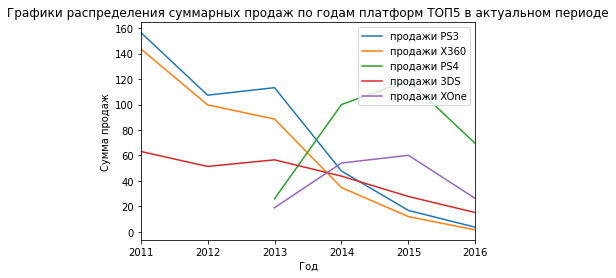

In [33]:
#Построим сводную таблицу 
relevant_sales_year = df_relevant.pivot_table(index = 'year_of_release', columns = 'platform',values='total_sales',aggfunc=sum)
#Построим графики 
plt.plot(relevant_sales_year['PS3'], label = 'продажи PS3')
plt.plot(relevant_sales_year['X360'], label = 'продажи X360')
plt.plot(relevant_sales_year['PS4'], label = 'продажи PS4')
plt.plot(relevant_sales_year['3DS'], label = 'продажи 3DS')
plt.plot(relevant_sales_year['XOne'], label = 'продажи XOne')
plt.title("Графики распределения суммарных продаж по годам платформ ТОП5 в актуальном периоде")
plt.xlabel("Год")
plt.ylabel("Сумма продаж")
plt.legend()
plt.xlim([2011, 2016])

In [34]:
#Количество платформ в исходной таблице
len(df['platform'].unique())

31

In [35]:
#Количество платформ в таблице с актуальном периодом
len(df_relevant['platform'].unique())

12

В актуальном периоде, который мы выбрали, из 31 платформы остались  12. Из этих 12 платформ DS и PSP можно исключить из потенциально прибыльных платформ, т.к. DS прекратила свое существование, а у PS2 продажи практически равно нулю.

<b>3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.</b>

(0.0, 2.5)

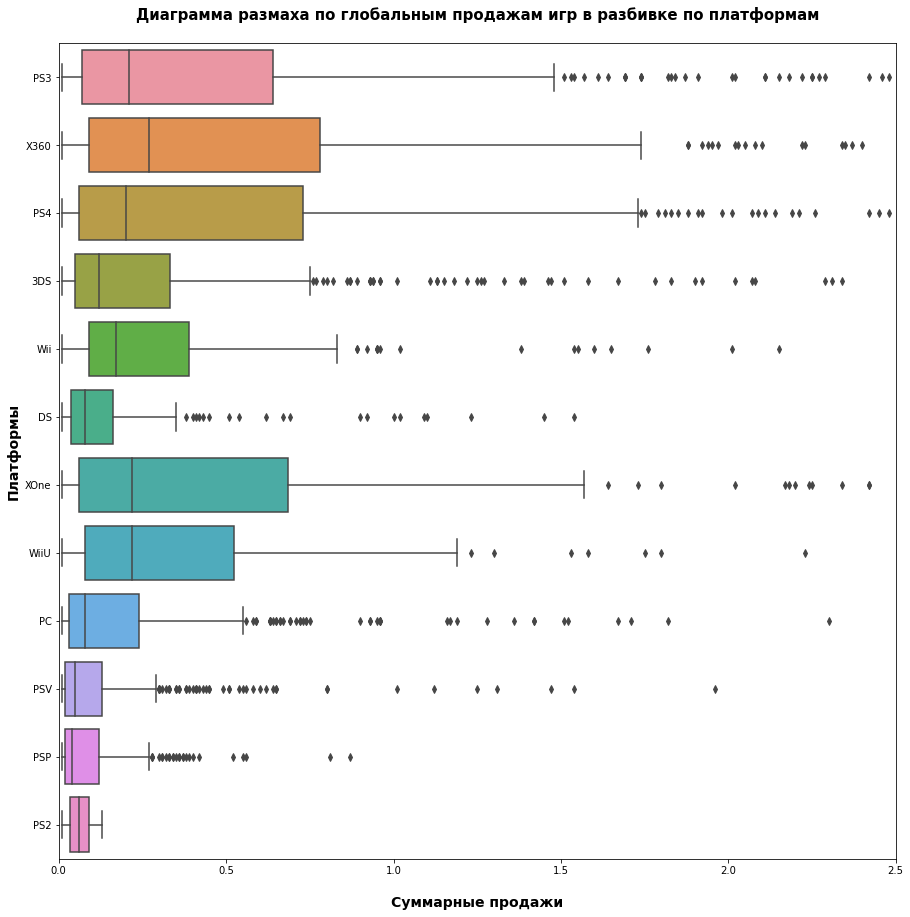

In [36]:
# Построим все "ящики с усами" на одном графике 
import seaborn as sns

plt.figure(figsize=(15,15))
sns.boxplot(data=df_relevant, x='total_sales', y='platform')
plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам\n', fontsize=15, fontweight="bold")
plt.xlabel("\nСуммарные продажи", fontsize=14, fontweight="bold")
plt.ylabel("Платформы", fontsize=14, fontweight="bold")
plt.xlim(0, 2.5)

По данным диаграммам легко определить была ли популярна платформа в актуальный период времени. Определить можно по объему продаж, входящему в межквартильный размах и медианному значению, чем они выше тем популярнее платформа. Например, PS4, X360, XOne-популярны.

<b>3.5 Зависимость продаж от оценок критиков и пользователей.</b>

Посмотрим, как влияют на продажи внутри одной популярной платформы(X360) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [37]:
#Корреляция между оценками пользователей и продажами 
X360 = df_relevant[df_relevant['platform']=='X360']
X360['user_score'].corr(X360['total_sales'])

0.18029334885340623

Коэффициент корреляции положительный, линейная связь есть, но слабая.

In [38]:
#Корреляция между оценками критиков и продажами 
X360['critic_score'].corr(X360['total_sales'])

0.3144894832154614

Коэффициент корреляции положительный, линейная связь есть, но слабая.Однака, в данном случае коэффициент корреляции выше, следовательно продажи больше зависят от оценок критиков.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

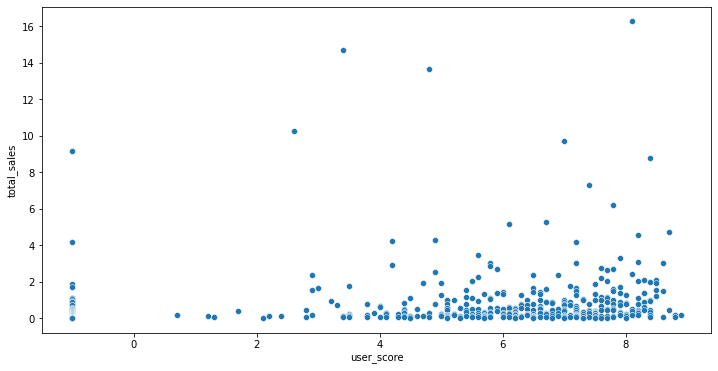

In [39]:
#Построим диаграмму рассеяния - оценка пользователей/продажи
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=X360)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

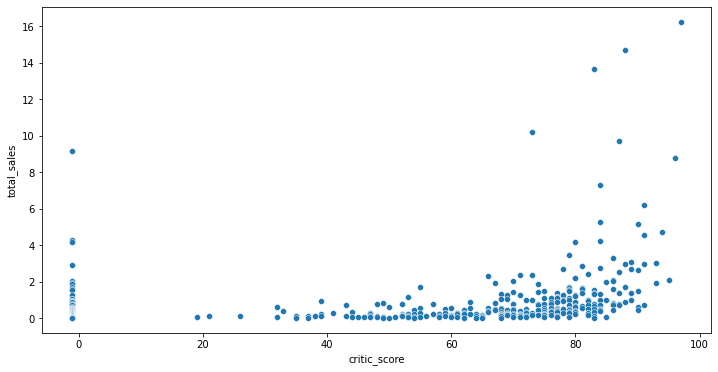

In [40]:
#Построим диаграмму рассеяния - оценка пользователей/продажи
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=X360)

Итак,на продажи больше влияет оценка критиков, чем  оценкам других пользователей.

Соотнесем вывод по Х360 с продажами игр на других платформах, входящих в топ5 в актуальном периоде.

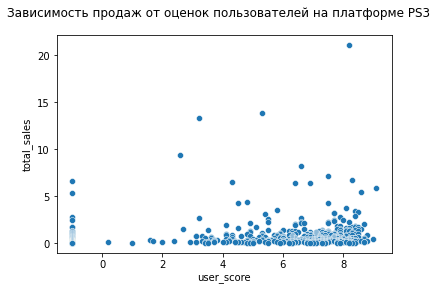

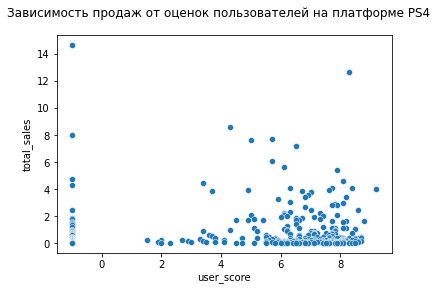

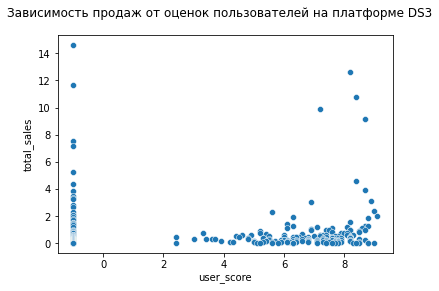

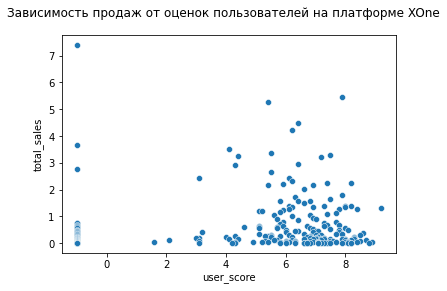

In [41]:
#Построим диаграммы рассеяния по оценке пользователей и продажам по другим платформам, входящих в топ5 в актуальном периоде 
#Определим корреляцию между оценками пользователей и продажами 
PS3 = df_relevant[df_relevant['platform']=='PS3']
PS4 = df_relevant[df_relevant['platform']=='PS4']
DS3 = df_relevant[df_relevant['platform']=='3DS']
XOne = df_relevant[df_relevant['platform']=='XOne']
sns.scatterplot(x='user_score', y='total_sales', data=PS3)
plt.suptitle('Зависимость продаж от оценок пользователей на платформе PS3')
plt.show()
sns.scatterplot(x='user_score', y='total_sales', data=PS4)
plt.suptitle('Зависимость продаж от оценок пользователей на платформе PS4')
plt.show()
sns.scatterplot(x='user_score', y='total_sales', data=DS3)
plt.suptitle('Зависимость продаж от оценок пользователей на платформе DS3')
plt.show()
sns.scatterplot(x='user_score', y='total_sales', data=XOne)
plt.suptitle('Зависимость продаж от оценок пользователей на платформе XOne')
plt.show()

In [42]:
PS3['user_score'].corr(PS3['total_sales'])

0.23271960193485092

In [43]:
PS4['user_score'].corr(PS4['total_sales'])

0.1159614931286009

In [44]:
DS3['user_score'].corr(DS3['total_sales'])

0.14642620870246353

In [45]:
XOne['user_score'].corr(XOne['total_sales'])

0.12171152458232884

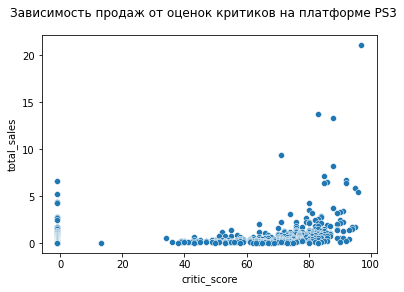

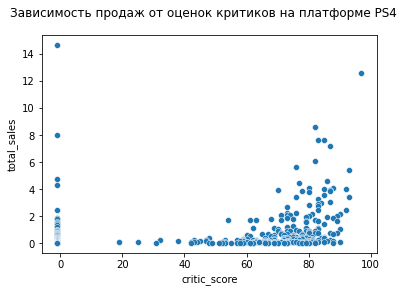

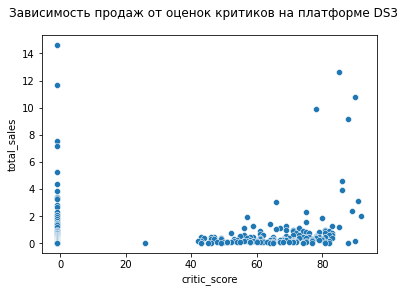

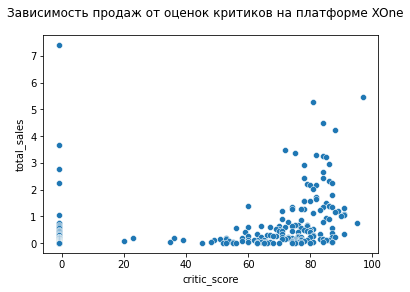

In [46]:
#Построим диаграммы рассеяния по оценке критиков и продажам по другим платформам, входящих в топ5 в актуальном периоде 
#Определим корреляцию между оценками пользователей и продажами 
sns.scatterplot(x='critic_score', y='total_sales', data=PS3)
plt.suptitle('Зависимость продаж от оценок критиков на платформе PS3')
plt.show()
sns.scatterplot(x='critic_score', y='total_sales', data=PS4)
plt.suptitle('Зависимость продаж от оценок критиков на платформе PS4')
plt.show()
sns.scatterplot(x='critic_score', y='total_sales', data=DS3)
plt.suptitle('Зависимость продаж от оценок критиков на платформе DS3')
plt.show()
sns.scatterplot(x='critic_score', y='total_sales', data=XOne)
plt.suptitle('Зависимость продаж от оценок критиков на платформе XOne')
plt.show()

In [47]:
PS3['critic_score'].corr(PS3['total_sales'])

0.3233822283130729

In [48]:
PS4['critic_score'].corr(PS4['total_sales'])

0.22652606614612347

In [49]:
DS3['critic_score'].corr(DS3['total_sales'])

0.16638104774453372

In [50]:
XOne['critic_score'].corr(XOne['total_sales'])

0.27378217261702115

У всех платформ присутствуем корреляция(хоть и слабая), между оценками пользователей и критиков к продажам.
Оценка пользователей слабо влияет на продажи. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей.

<b>3.6 Общее распределение игр по жанрам.</b>

Оценим количественное распределение по жанрам в актуальном периоде.

<AxesSubplot:ylabel='genre'>

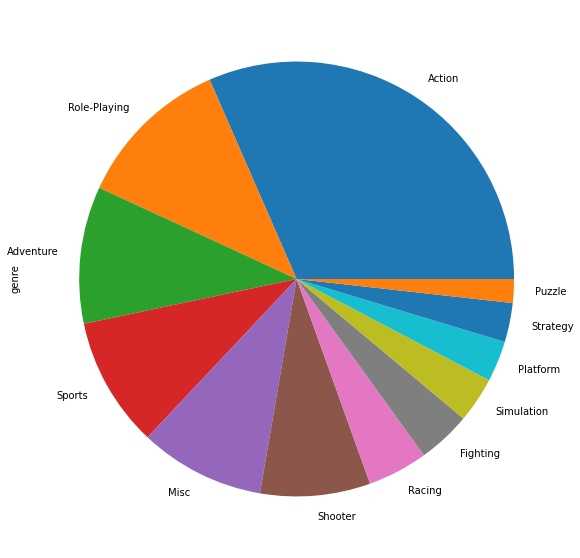

In [51]:
df_relevant['genre'].value_counts().plot(kind='pie', figsize=(10, 10), legend=False)

Жанр Action самый многочисленный, далее идут игры ролевые, приключения и спортивные. Наименьшее количество игр в жанре Puzzle.

Определим как распределяются суммарные продажи в зависимости от жанра игры.

<AxesSubplot:xlabel='genre'>

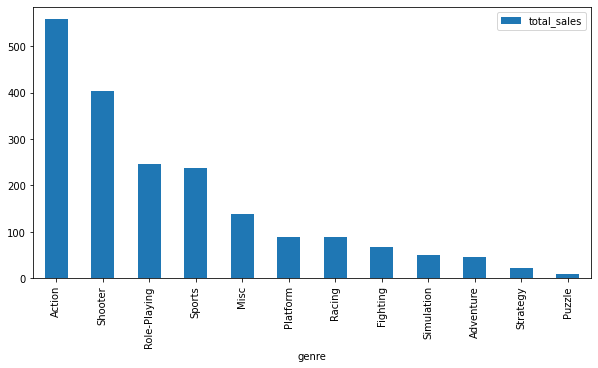

In [52]:
df_relevant.pivot_table(index='genre', aggfunc={'total_sales':sum}).sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='bar', figsize=(10, 5))


Определим как распределяются медианные продажи в зависимости от жанра игры.

<AxesSubplot:xlabel='genre'>

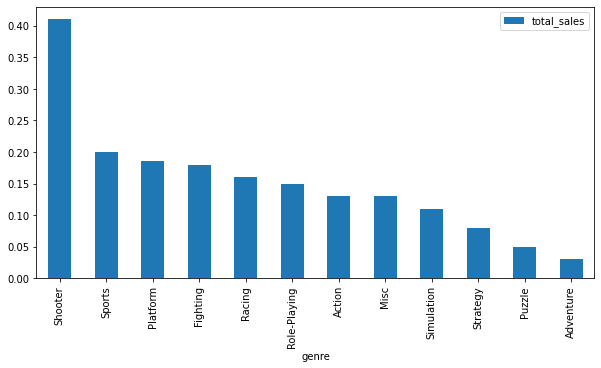

In [53]:
df_relevant.pivot_table(index='genre', aggfunc={'total_sales':'median'}).sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='bar', figsize=(10, 5))

ПО СУММАРНЫМ ПРОДАЖАМ: Жанр Action лидирует, далее идут игры жанра Shooter и Role-playing. Игры жанра Adventure в конце списка. Несмотря на то, что производят их довольно много продаются они крайне плохо по сравнению с остальными жанрами. Жанр Puzzle замыкает список.

ПО МЕДИАННЫМ ПРОДАЖАМ: Жанр Shooter лидирует, далее идут игры жанра Platform и Sports. Жанры Puzzle и Adventure также замыкают список.

### Шаг 4. Портрет пользователя каждого региона (NA, EA, JP)

<b>4.1 Самые популярные платформы (топ-5).</b>

In [54]:
#Посчитаем суммарные продажи по платформам 
top5_platforms_per_region = (df_relevant.pivot_table(index='platform', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum}))   
top5_platforms_per_region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,61.27,100.62,82.65
DS,9.24,8.04,18.86
PC,56.70,0.00,29.88
PS2,0.13,0.09,0.13
PS3,163.10,49.39,168.26
PS4,141.09,15.96,108.74
PSP,1.77,24.04,2.19
PSV,13.07,21.84,12.47
Wii,29.60,8.97,48.56


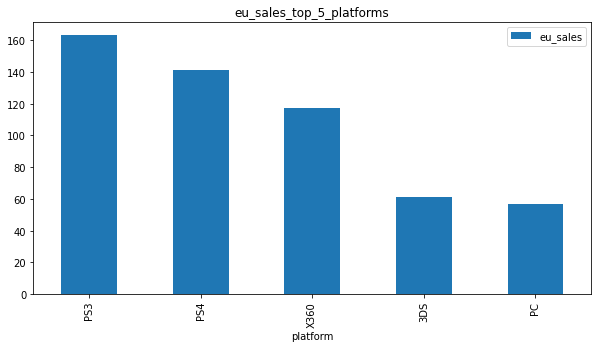

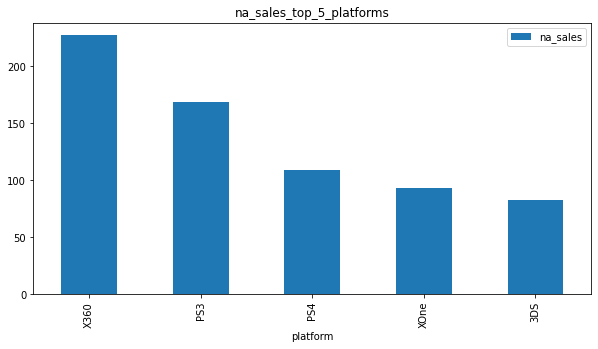

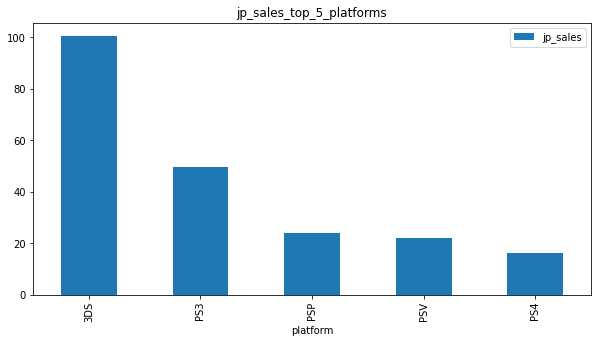

In [55]:
#Построим графики распределения продаж по платформам оставив топ5:
# список регионов для цикла
region = ['eu_sales', 'na_sales', 'jp_sales']

for i in range(0, 3):
    (top5_platforms_per_region
     .nlargest(5, columns=region[i])
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+'_top_5_platforms'))

В Европе самая популярная платформа PS3, в Северной Америке X360, в Японии - Nintendo 3DS. 

<b>4.2 Самые популярные жанры (топ-5).</b>

In [56]:
#Посчитаем суммарные продажи по жанрам
top5_genre_per_region = (df_relevant.pivot_table(index='genre', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum}))   
top5_genre_per_region

,eu_sales,jp_sales,na_sales
genre,,,
Action,199.12,63.62,230.92
Adventure,13.96,12.07,14.76
Fighting,16.24,12.38,31.63
Misc,39.72,17.60,69.69
Platform,30.07,12.13,38.28
Puzzle,3.56,2.91,2.74
Racing,40.58,5.64,31.98
Role-Playing,62.30,79.87,83.78
Shooter,148.02,11.92,194.43


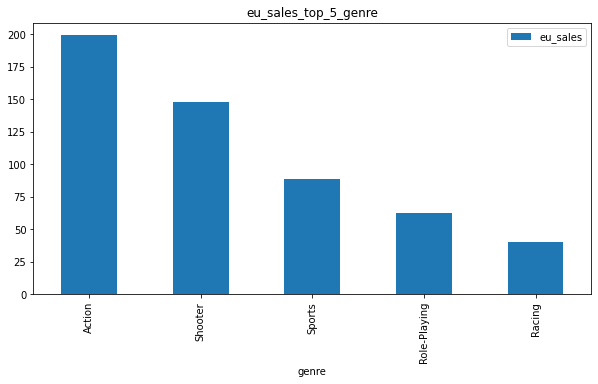

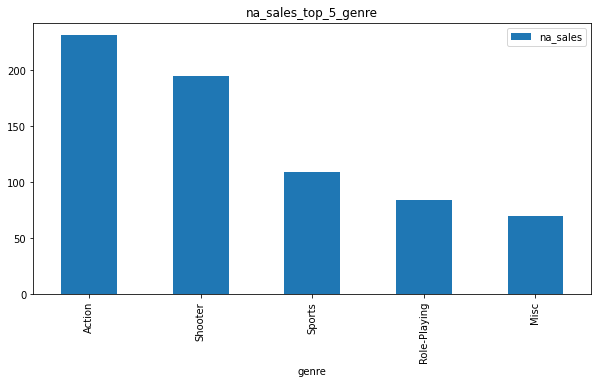

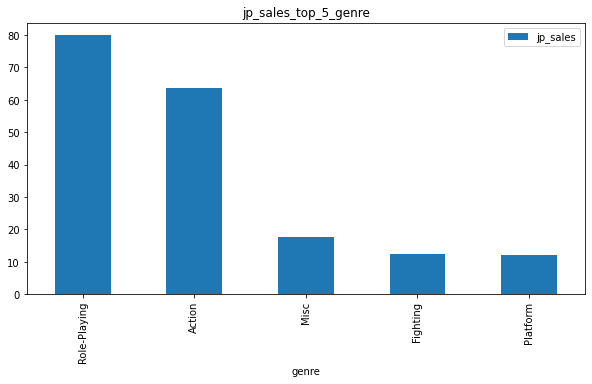

In [57]:
#Построим графики распределения продаж по жанрам оставив топ5:
for i in range(0, 3):
    (top5_genre_per_region
     .nlargest(5, columns=region[i])
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+'_top_5_genre'))

Пользователи Европы и Северной Америки почти не различаются, за исключением последнего жанра: в Европе это гонки, а в Северной Америке - другое. Пользователи Японии  предпочитают ролевые игры. В Японии жанры Role и Action лидеры в продажах с резким отрывом от остальных жанров.

<b>4.3 Влияние  рейтинга ESRB на продажи в отдельном регионе</b>

In [58]:
#Построим сводную таблицу
rating_sum = df_relevant.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
rating_sum

,eu_sales,jp_sales,na_sales
rating,,,
E,141.73,36.68,170.17
E10+,78.00,11.23,117.72
EC,0.00,0.00,0.42
M,250.26,26.14,308.45
RP,0.03,0.00,0.00
T,83.16,33.39,109.31
unknown,116.61,138.21,123.69


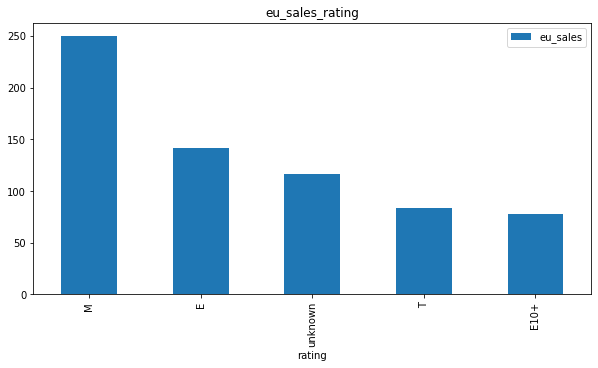

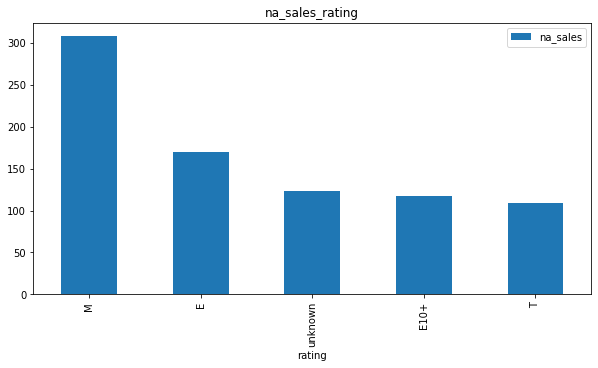

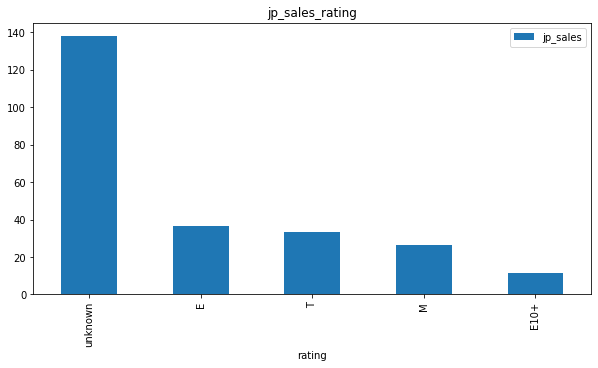

In [59]:
#Построим графики распределения продаж в зависимости от рейтинга:
for i in range(0, 3):
    (rating_sum
     .nlargest(5, columns=region[i])
     .sort_values(by=region[i], ascending=False)
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+'_rating'))

В Америке и Европе практически идентичное распределение продаж в зависимости от рейтингов: преобладают, с большим отрывом, игры с рейтингом М, далее идут игры с рейтингом Е, на третьем месте игры с неизвестным рейтингом.
В Японии лидируют игры с неизвестным рейтингом с большим отрывом, меньше всего популярны игры 10+.

В целом можно сказать, что американцы и европейцы схожи в выборе платформ, жанров и возрастного рейтинга игр. Т.е. портреты пользователей идентичны. Японцы сильно отличаются в предпочтениях от западных пользователей.

### Шаг 5. Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Альтернативная гипотеза двусторонняя, т.к. средний рейтинг может отличаться как в большую, так и в меньшую сторону.

Чтобы проверить двустороннюю гипотезу о равенстве средних двух выборок применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где equal_var - параметр, задающий считать ли равными дисперсии выборок. Поэтому, сначала определим дисперсии выборок. 

In [64]:
# удалим из выборки отрицательные значения, которыми ранее заменили пропуски чтобы они не влияли на распределения
import numpy as np
from scipy import stats as st
xbox_one_ttest = df_relevant[(df_relevant['platform']=='XOne')&(df_relevant['user_score'] >= 0)]['user_score']
pc_ttest = df_relevant[(df_relevant['platform']=='PC')&(df_relevant['user_score'] >= 0)]['user_score']

# проверим дисперсии рассматриваемых выборок
xbox_one_ttest_var = np.var(xbox_one_ttest, ddof=1)
pc_ttest_var = np.var(pc_ttest, ddof=1)

print('Дисперсия платформы Xbox One:', round(xbox_one_ttest_var, 2))
print('Дисперсия платформы PC:', round(pc_ttest_var, 2))

Дисперсия платформы Xbox One: 1.91
Дисперсия платформы PC: 2.6


Разница между дисперсиями выборок составляет 0,69, поэтому считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False.

In [65]:
# уровень значимости 5%
alpha = 0.05

results = st.ttest_ind(xbox_one_ttest, pc_ttest, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


р-уровень значимости составил 61,3%, что значительно выше 5%, следовательно у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

В данной двусторонней гипотезе нам также нужно сравнить средние двух выборок, поэтому применим тот же тест ttest_ind.

In [66]:
# удалим из выборки отрицательные значения, которыми ранее заменили пропуски  чтобы они не влияли на распределения
action_ttest = df_relevant[(df_relevant['genre']=='Action')&(df_relevant['user_score'] >= 0)]['user_score']
sports_ttest = df_relevant[(df_relevant['genre']=='Sports')&(df_relevant['user_score'] >= 0)]['user_score']

# проверим дисперсии рассматриваемых выборок
action_ttest_var = np.var(action_ttest, ddof=1)
sports_ttest_var = np.var(sports_ttest, ddof=1)

print('Дисперсия жанра Action:', round(action_ttest_var, 2))
print('Дисперсия жанра Sports:', round(sports_ttest_var, 2))

Дисперсия жанра Action: 1.81
Дисперсия жанра Sports: 2.88


Разница между дисперсиями выборок составляет 0,93, поэтому считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False.

In [63]:
# уровень значимости зададим равным 5%
alpha = 0.05

results = st.ttest_ind(action_ttest, sports_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


p-уровень значимости намного меньше определенного  порогового значения в 5%, следовательно средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.

### Шаг 6. Общий вывод

Проведя анализ  можно сказать следующее:

Наибольшие суммарные продажи в актуальном периоде (2011-2016гг) имеют платформы (топ5) это PS3, X360, PS4,3DS, XOne. 
 
В разных регионах популярные платформы могут отличаться, например платформа 3DS очень популярна в Японии, но менее популярна в Европе и Америке. 
Среди жанров видеоигр также можно выделить наиболее популярные и перспективные, например жанр Action перспективный во всех регионах, а также жанры Shooter, Sports и Role-Playing являются потенциально прибыльными.

Жанр  Adventure. Несмотря на то, что игры с таким жанром занимают серьезную долю рынка в количественном отношении, их продажи низкие.

Среди игроков Европы и Северной Америки наибеолее популярны игры рейтинга М и Е. В то время как в Японии с большим отрывом лидируют игры, для которых рейтинг неустановлен.

Большое влияние на продажи игр оказывают их оценки. Оценки критиков сильнее влияют на  продажами, чем оценки пользователей. Поэтому стоит учитывать только оценки критиков. 

В целом пользователи из регионов Европа и Северная Америка очень схожи в своих предпочтених и можно объеденить усилия рекламной компании для этих направлений и вместе с тем  более тщательно подготовить рекламную компанию для Японии.